In [28]:
%load_ext autoreload
%autoreload 2
import utils
import importlib
importlib.reload(utils)

figs_dir = '/Users/atk42/OneDrive - Yale University/Kuan Lab Shared/Projects/TEM_tomo/fig_panels/'


((36, 36), (36, 36), (36, 36))

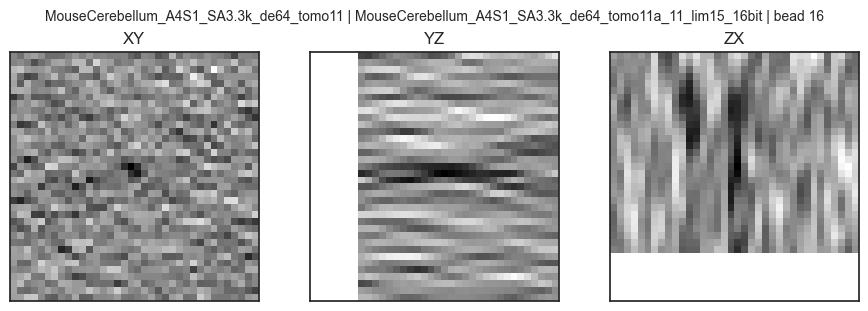

In [318]:
# Spot-check bead image downloads
utils.plot_bead_views("MouseCerebellum_A4S1_SA3.3k_de64_tomo11",
                      "MouseCerebellum_A4S1_SA3.3k_de64_tomo11a_11_lim15_16bit",
                      16, root_dir="250925_beads_data_3k", clip_percentile = None)
xy, yz, zx = views["XY"], views["YZ"], views["ZX"]
xy.shape, yz.shape, zx.shape

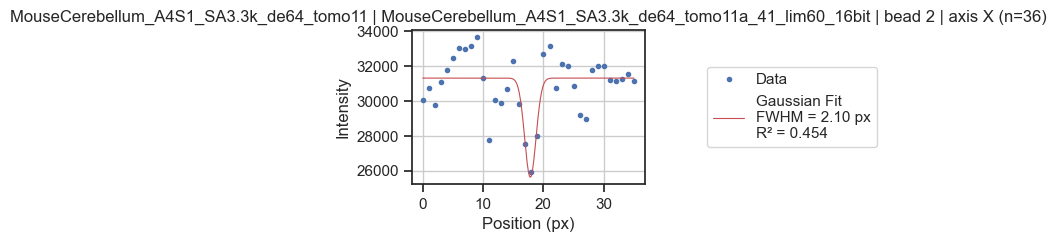

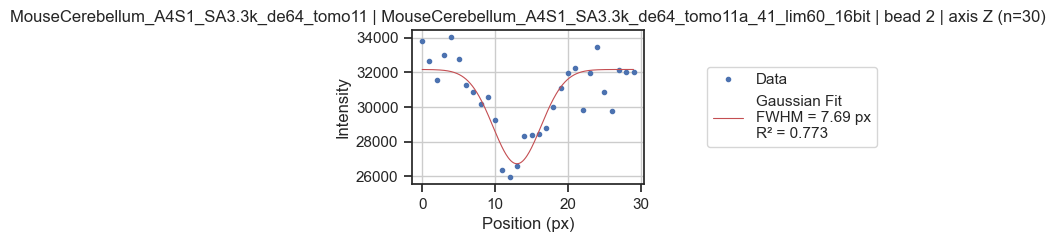

In [353]:
import utils
import importlib
importlib.reload(utils)

res = utils.spot_check_fit_minimal(
    tomogram="MouseCerebellum_A4S1_SA3.3k_de64_tomo11",
    recon_label="MouseCerebellum_A4S1_SA3.3k_de64_tomo11a_41_lim60_16bit",
    bead_index=2,
    root_dir="250925_beads_data_3k",
    axes_to_show=("X","Z"),
    linewidth=1,
    bead_diam_nm = 5,
    pixel_size_nm = 4.9,
    # bead_diam_nm=0.0, pixel_size_nm=None  # defaults
)

In [3]:
from importlib import reload
import utils; reload(utils)

beads_df_3k = utils.fits_dataframe_from_config(
    "250827_tomograms_beads.yaml",
    root_dir="250925_beads_data_3k",
    linewidth=1,
    r2_cutoff=0.6,     
    bead_diam_nm = 5.0,
)
beads_df_3k.head()


⚠️ Gaussian fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
[MouseCerebellum_A4S1_SA3.3k_de64_tomo11] beads: total=152, pass (R²≥0.6)=49 (32.2%)
[MouseCerebellum_A3S1_SA3.3k_de64_tomo10] beads: total=112, pass (R²≥0.6)=51 (45.5%)
[MouseCerebellum_A2S1_SA3.3k_de64_tomo14] beads: total=71, pass (R²≥0.6)=66 (93.0%)


,tomogram,thickness,pxl_size,recon_label,num_proj,max_angle,bead_id,n_beads_total,n_beads_pass,fwhm_x,fwhm_y,fwhm_z,res_nm_x,res_nm_y,res_nm_z
0,MouseCerebellum_A4S1_SA3.3k_de64_tomo11,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo11a_11_li...,11.0,15.0,0,152,49,2.122024,NaN,14.400976,10.397915,NaN,70.564783
1,MouseCerebellum_A4S1_SA3.3k_de64_tomo11,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo11a_11_li...,11.0,15.0,8,152,49,2.226931,1.201123,7.974486,10.911964,5.885502,39.074982
2,MouseCerebellum_A4S1_SA3.3k_de64_tomo11,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo11a_11_li...,11.0,15.0,15,152,49,3.030837,1.478684,11.344027,14.851099,7.245550,55.585731
3,MouseCerebellum_A4S1_SA3.3k_de64_tomo11,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo11a_11_li...,11.0,15.0,20,152,49,2.798902,NaN,14.343271,13.714620,NaN,70.282028
4,MouseCerebellum_A4S1_SA3.3k_de64_tomo11,1000.0,4.9,MouseCerebellum_A4S1_SA3.3k_de64_tomo11a_11_li...,11.0,15.0,21,152,49,2.199274,1.102950,7.172835,10.776441,5.404456,35.146891


Tomogram = MouseCerebellum_A4S1_SA3.3k_de64_tomo11
N = 49 beads, Thickness = 1000.0
11.0: 57.2 ± 11.88 nm
15.0: 44.5 ± 8.06 nm
21.0: 37.0 ± 6.99 nm
25.0: 33.9 ± 7.24 nm
31.0: 31.7 ± 5.45 nm
35.0: 31.1 ± 5.69 nm
41.0: 30.4 ± 5.59 nm
Tomogram = MouseCerebellum_A3S1_SA3.3k_de64_tomo10
N = 51 beads, Thickness = 750.0
11.0: 57.8 ± 8.48 nm
15.0: 42.6 ± 5.32 nm
21.0: 34.4 ± 4.01 nm
25.0: 31.3 ± 4.57 nm
31.0: 29.0 ± 5.14 nm
35.0: 27.2 ± 5.36 nm
41.0: 26.7 ± 5.04 nm
Tomogram = MouseCerebellum_A2S1_SA3.3k_de64_tomo14
N = 66 beads, Thickness = 500.0
11.0: 50.8 ± 5.00 nm
15.0: 38.9 ± 4.46 nm
21.0: 30.3 ± 2.18 nm
25.0: 27.4 ± 3.38 nm
31.0: 24.8 ± 3.41 nm
35.0: 24.0 ± 3.40 nm
41.0: 23.2 ± 3.90 nm


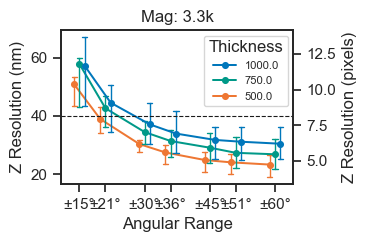

In [368]:
# Main Plot for FSC res vs # projections 
# Fig. 1e
max_angs = [60,51,45,36,30,21,15]
theta_labels = ['±%s°' % ang for ang in max_angs]

num_angs = [41,35,31,25,21,15,11]
thick_pal={1000:'#0077BB',750:'#009988',500:'#EE7733'}
mag = '3.3k'
#mag = '11k'
if mag == '3.3k':
    my_df = beads_df_3k
elif mag == '11k':
    my_df = beads_df_11k

#pixel_size = my_df['pixel_size'].values[0]

sns.set_theme(rc={'figure.figsize':(3,2),'lines.linewidth':0.8},style = 'ticks')

g = sns.pointplot(my_df,x='max_angle', y = 'res_nm_z', hue='thickness', estimator='mean',
            errorbar=('pi',50), 
            #errorbar = None,
            native_scale=True, dodge = .4, palette=thick_pal,
            log_scale = False,  markersize = 4, capsize = .2,
            err_kws={'linewidth':1})


handles, labels = g.get_legend_handles_labels()
order = [2,1,0]
#g.legend().remove()
g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=8,
         title = 'Thickness')
#g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10,
#         title = 'Thickness', bbox_to_anchor=(-0.3, -.8), loc='lower left',ncol=3)
g.axhline(y=40, color = 'k', linestyle = '--')
g.set_xlabel('Angular Range')
g.set_ylabel('Z Resolution (nm)')
g.set_title('Mag: %s' % mag)#, ha='left', x = 0.1)
#g.grid(axis='y', color = 'k', linewidth=0.5)
#g.set_ylim([0,g.get_ylim()[1]])
g.set_xticks(max_angs)
g.set_xticklabels(theta_labels)

pixel_size = my_df['pxl_size'].values[0]
ax2 = g.twinx()
y1, y2 = g.get_ylim()
ax2.set_ylim(y1/pixel_size, y2/pixel_size)
#ax2.set_yticks([2,3])
ax2.set_ylabel('Z Resolution (pixels)')
#sns.despine()

import numpy as np
import scipy.stats as stats
#num_ang = 21
for tomo in my_df.tomogram.unique():
    thickness = my_df[my_df.tomogram == tomo]['thickness'].values[0]
    n_beads = my_df[my_df.tomogram == tomo]['n_beads_pass'].values[0]
    #for thickness in my_df.thickness.unique():
    print('Tomogram = %s' % tomo)
    print('N = %i beads, Thickness = %0.1f' % (n_beads,thickness))
    for num_proj in my_df.num_proj.unique():
        test_df = my_df[my_df.thickness == thickness]
        test_df = test_df[test_df.num_proj == num_proj]
        print('%s: %0.1f ± %0.2f nm' % (num_proj,np.mean(test_df.res_nm_z.values),stats.iqr(test_df.res_nm_z.values)/2))

import matplotlib.pyplot as plt
plt.savefig(figs_dir + '250925_rev_Fig1g_Zres_beads_%s.pdf' % mag, bbox_inches = 'tight')


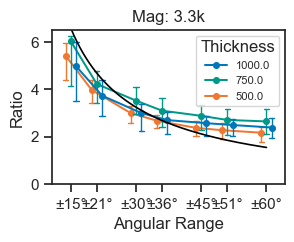

In [367]:
# Main Plot for FSC res vs # projections 
# Fig. 1e
max_angs = [60,51,45,36,30,21,15]
theta_labels = ['±%s°' % ang for ang in max_angs]

num_angs = [41,35,31,25,21,15,11]
thick_pal={1000:'#0077BB',750:'#009988',500:'#EE7733'}
mag = '3.3k'
#mag = '11k'
if mag == '3.3k':
    my_df = beads_df_3k

elif mag == '11k':
    my_df = beads_df_11k

#pixel_size = my_df['pixel_size'].values[0]
my_df["zx_ratio"] = my_df["fwhm_z"].div(my_df["fwhm_x"]).where(my_df["fwhm_x"].gt(0))


sns.set_theme(rc={'figure.figsize':(3,2),'lines.linewidth':0.8},style = 'ticks')


g = sns.pointplot(my_df,x='max_angle', y = 'zx_ratio', hue='thickness', estimator='mean',
            errorbar=('pi',50), 
            #errorbar = None,
            native_scale=True, dodge = .4, palette=thick_pal,
            log_scale = False,  markersize = 4, capsize = .2,
            err_kws={'linewidth':1})


handles, labels = g.get_legend_handles_labels()
order = [2,1,0]
#g.legend().remove()
g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=8,
         title = 'Thickness')
#g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10,
#         title = 'Thickness', bbox_to_anchor=(-0.3, -.8), loc='lower left',ncol=3)

g.set_xlabel('Angular Range')
g.set_ylabel('Ratio')
g.set_title('Mag: %s' % mag)#, ha='left', x = 0.1)
#g.grid(axis='y', color = 'k', linewidth=0.5)
g.set_ylim([0,g.get_ylim()[1]])
g.set_xticks(max_angs)
g.set_xticklabels(theta_labels)


# Rademacher e_xz(alpha) curve
def e_xz_rademacher(a_deg):
    a = np.deg2rad(a_deg)
    num = a + np.sin(a) * np.cos(a)
    den = a - np.sin(a) * np.cos(a)
    return np.sqrt(np.where(den != 0, num / den, np.nan))

alpha_curve = np.linspace(my_df["max_angle"].min(), my_df["max_angle"].max(), 400)
g.plot(alpha_curve, e_xz_rademacher(alpha_curve), color="black", lw=1.2, label="Theory")
plt.savefig(figs_dir + '250925_rev1_Zratio_beads_%s.pdf' % mag, bbox_inches = 'tight')

In [23]:
# Analyze 11k data

from importlib import reload
import utils; reload(utils)

beads_df_11k = utils.fits_dataframe_from_config(
    "251002_tomograms_11k_beads.yaml",
    root_dir="251002_beads_data_11k",
    linewidth=1,
    r2_cutoff=0.6,     
    bead_diam_nm = 5.0,
)
beads_df_11k.head()


[MouseCerebellum_A2S1_SA11k_de64_tomo26] beads: total=99, pass (R²≥0.6)=78 (78.8%)


/Users/atk42/Repos/tem-tomo/bead_resolution/utils.py:310: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(gaussian, x, profile_1d, p0=p0)


,tomogram,thickness,pxl_size,recon_label,num_proj,max_angle,bead_id,n_beads_total,n_beads_pass,fwhm_x,fwhm_y,fwhm_z,res_nm_x,res_nm_y,res_nm_z
0,MouseCerebellum_A2S1_SA11k_de64_tomo26,500.0,1.4,MouseCerebellum_A2S1_SA11k_de64_tomo26a_41_lim...,41.0,60.0,1,99,78,2.941280,2.297652,6.710594,4.117791,3.216713,9.394832
1,MouseCerebellum_A2S1_SA11k_de64_tomo26,500.0,1.4,MouseCerebellum_A2S1_SA11k_de64_tomo26a_41_lim...,41.0,60.0,2,99,78,5.104712,2.605059,6.241118,7.146597,3.647083,8.737565
2,MouseCerebellum_A2S1_SA11k_de64_tomo26,500.0,1.4,MouseCerebellum_A2S1_SA11k_de64_tomo26a_41_lim...,41.0,60.0,5,99,78,4.616753,2.919618,8.715052,6.463454,4.087466,12.201073
3,MouseCerebellum_A2S1_SA11k_de64_tomo26,500.0,1.4,MouseCerebellum_A2S1_SA11k_de64_tomo26a_41_lim...,41.0,60.0,8,99,78,5.530815,2.407504,7.770408,7.743140,3.370505,10.878571
4,MouseCerebellum_A2S1_SA11k_de64_tomo26,500.0,1.4,MouseCerebellum_A2S1_SA11k_de64_tomo26a_41_lim...,41.0,60.0,9,99,78,3.452239,3.349537,6.069146,4.833135,4.689352,8.496804


Tomogram = MouseCerebellum_A2S1_SA11k_de64_tomo26
N = 78 beads, Thickness = 500.0
41.0: 10.8 ± 1.39 nm
31.0: 12.1 ± 1.53 nm
21.0: 16.0 ± 2.17 nm
11.0: 31.9 ± 8.09 nm


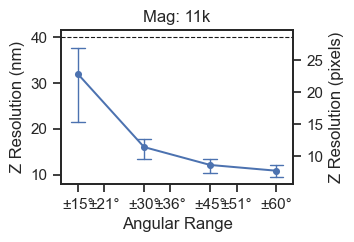

In [29]:
# 11k Plot for FSC res vs # projections 
import seaborn as sns


max_angs = [60,51,45,36,30,21,15]
theta_labels = ['±%s°' % ang for ang in max_angs]

num_angs = [41,35,31,25,21,15,11]
thick_pal={1000:'#0077BB',750:'#009988',500:'#EE7733'}
mag = '11k'
if mag == '3.3k':
    my_df = beads_df_3k
elif mag == '11k':
    my_df = beads_df_11k

my_df = my_df[my_df['res_nm_z']<100]
#pixel_size = my_df['pixel_size'].values[0]

sns.set_theme(rc={'figure.figsize':(3,2),'lines.linewidth':0.8},style = 'ticks')


g = sns.pointplot(my_df,x='max_angle', y = 'res_nm_z', estimator='mean',
            errorbar=('pi',50), 
            #errorbar = None,
            native_scale=True, 
            log_scale = False,  markersize = 4, capsize = .2,
            err_kws={'linewidth':1})

handles, labels = g.get_legend_handles_labels()
order = [2,1,0]
#g.legend().remove()
#g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=8,
#         title = 'Thickness')
#g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10,
#         title = 'Thickness', bbox_to_anchor=(-0.3, -.8), loc='lower left',ncol=3)
g.axhline(y=40, color = 'k', linestyle = '--')
g.set_xlabel('Angular Range')
g.set_ylabel('Z Resolution (nm)')
g.set_title('Mag: %s' % mag)#, ha='left', x = 0.1)
#g.grid(axis='y', color = 'k', linewidth=0.5)
#g.set_ylim([0,g.get_ylim()[1]])
g.set_xticks(max_angs)
g.set_xticklabels(theta_labels)

pixel_size = my_df['pxl_size'].values[0]
ax2 = g.twinx()
y1, y2 = g.get_ylim()
ax2.set_ylim(y1/pixel_size, y2/pixel_size)
#ax2.set_yticks([2,3])
ax2.set_ylabel('Z Resolution (pixels)')
#sns.despine()

import numpy as np
import scipy.stats as stats
#num_ang = 21
for tomo in my_df.tomogram.unique():
    thickness = my_df[my_df.tomogram == tomo]['thickness'].values[0]
    n_beads = my_df[my_df.tomogram == tomo]['n_beads_pass'].values[0]
    #for thickness in my_df.thickness.unique():
    print('Tomogram = %s' % tomo)
    print('N = %i beads, Thickness = %0.1f' % (n_beads,thickness))
    for num_proj in my_df.num_proj.unique():
        test_df = my_df[my_df.thickness == thickness]
        test_df = test_df[test_df.num_proj == num_proj]
        print('%s: %0.1f ± %0.2f nm' % (num_proj,np.mean(test_df.res_nm_z.values),stats.iqr(test_df.res_nm_z.values)/2))

import matplotlib.pyplot as plt
plt.savefig(figs_dir + '251002_rev1_11k_Zres_beads_%s.pdf' % mag, bbox_inches = 'tight')

/var/folders/vt/w6ggr1fn7ys7zyrbpq3d7ls5gbhsxz/T/ipykernel_41538/2279723262.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["zx_ratio"] = my_df["fwhm_z"].div(my_df["fwhm_x"]).where(my_df["fwhm_x"].gt(0))


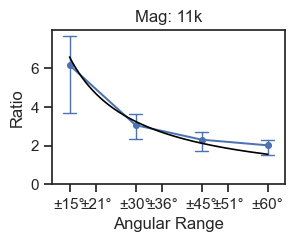

In [33]:
# Main Plot for FSC res vs # projections 
# Fig. 1e
max_angs = [60,51,45,36,30,21,15]
theta_labels = ['±%s°' % ang for ang in max_angs]

num_angs = [41,35,31,25,21,15,11]
thick_pal={1000:'#0077BB',750:'#009988',500:'#EE7733'}
mag = '3.3k'
mag = '11k'
if mag == '3.3k':
    my_df = beads_df_3k

elif mag == '11k':
    my_df = beads_df_11k

my_df = my_df[my_df['res_nm_z']<100]
#pixel_size = my_df['pixel_size'].values[0]
my_df["zx_ratio"] = my_df["fwhm_z"].div(my_df["fwhm_x"]).where(my_df["fwhm_x"].gt(0))


sns.set_theme(rc={'figure.figsize':(3,2),'lines.linewidth':0.8},style = 'ticks')


g = sns.pointplot(my_df,x='max_angle', y = 'zx_ratio', estimator='mean',
            errorbar=('pi',50), 
            #errorbar = None,
            native_scale=True, 
            log_scale = False,  markersize = 4, capsize = .2,
            err_kws={'linewidth':1})


handles, labels = g.get_legend_handles_labels()
order = [2,1,0]
#g.legend().remove()
#g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=8,
#         title = 'Thickness')
#g.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=10,
#         title = 'Thickness', bbox_to_anchor=(-0.3, -.8), loc='lower left',ncol=3)

g.set_xlabel('Angular Range')
g.set_ylabel('Ratio')
g.set_title('Mag: %s' % mag)#, ha='left', x = 0.1)
#g.grid(axis='y', color = 'k', linewidth=0.5)
g.set_ylim([0,g.get_ylim()[1]])
g.set_xticks(max_angs)
g.set_xticklabels(theta_labels)


# Rademacher e_xz(alpha) curve
def e_xz_rademacher(a_deg):
    a = np.deg2rad(a_deg)
    num = a + np.sin(a) * np.cos(a)
    den = a - np.sin(a) * np.cos(a)
    return np.sqrt(np.where(den != 0, num / den, np.nan))

alpha_curve = np.linspace(my_df["max_angle"].min(), my_df["max_angle"].max(), 400)
g.plot(alpha_curve, e_xz_rademacher(alpha_curve), color="black", lw=1.2, label="Theory")
plt.savefig(figs_dir + '251002_rev1_Zratio_beads_11k_%s.pdf' % mag, bbox_inches = 'tight')